Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


Start simulation:

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
SIM_TIME = 500 # seconds
NUMBER_RESOURCES = 5
NUMBER_RNA_POLYMERASES = 3
NUMBER_RIBOSOMES = 2
RANDOM_SEED = 42

protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    random_seed=RANDOM_SEED,
    verbose=False
    )

Simulation environment initialized


In [4]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
5 resources available,
3 RNA polymerases,
2 ribosomes.


In [5]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
End simulation: 546 proteins synthesized.


In [6]:
protein_synthesis_process.save_process() # save the process

Process saved.


Results:

In [7]:
results_df = protein_synthesis_process.dna_sequences_df

In [8]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 129
Number of DNA sequence not traslated: 86


In [9]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized']]

,polypeptides_chains,number_of_proteins_synthesized
838,"[NH2-MSRGVLRRSSPRVGLRCPPSPTHPTLVEPPL-COOH, NH2...",2
1121,[NH2-MVTRQLSISLKTRLKTFKSP-COOH],1
2535,[NH2-MLVPFLKLR-COOH],1
3052,[NH2-MVLAFTDSGFYYHYHCRYYYFYYKYSDILCNFALVVSYPQY...,2
4161,[NH2-MERRDPPPPARRALPEVPLRRSAVPRRPAVPRRLSSVAPLG...,1
...,...,...
182407,"[NH2-MRQRAAGVGTPRPGYTFDDGRRPGRPPLGMSEN-COOH, N...",2
182580,"[NH2-MG-COOH, NH2-MG-COOH, NH2-MG-COOH, NH2-MG...",8
183117,[NH2-MEVRGLTQGPQKNRLRRATNSEKKGLFFYLTFDGQPLKNTS...,7
184365,[NH2-MR-COOH],1


Plot results

In [10]:
from src.utils import barplot_proteins_number, plot_cumulative_proteins_number_over_time, plot_proteins_number_over_time

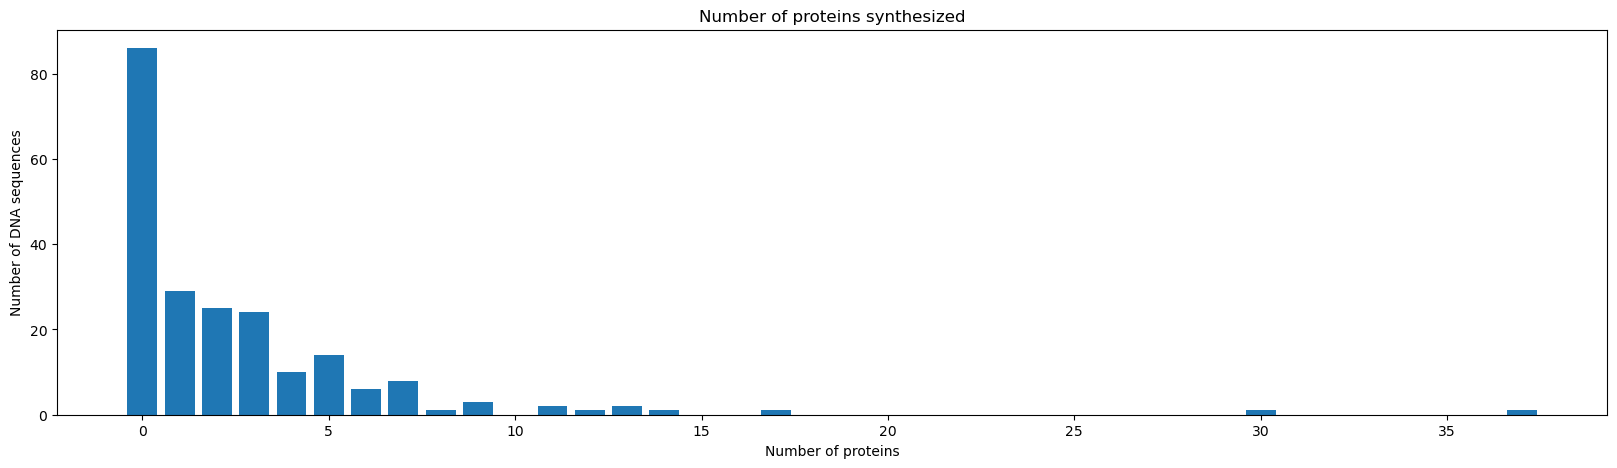

In [11]:
barplot_proteins_number(results_df)

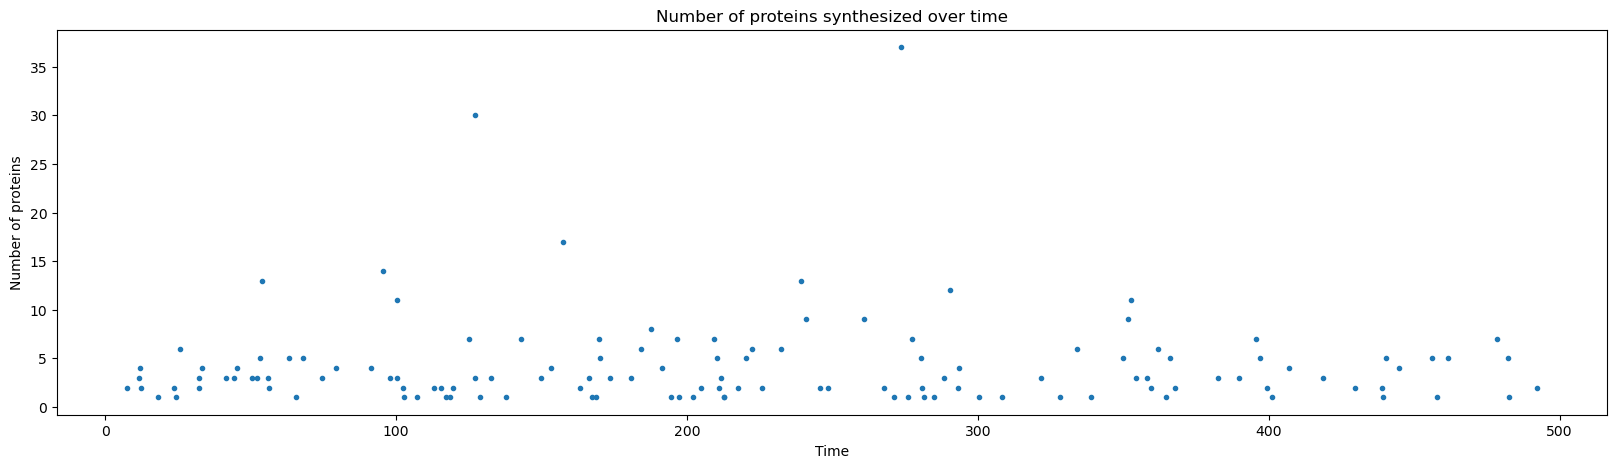

In [12]:
plot_proteins_number_over_time(results_df)

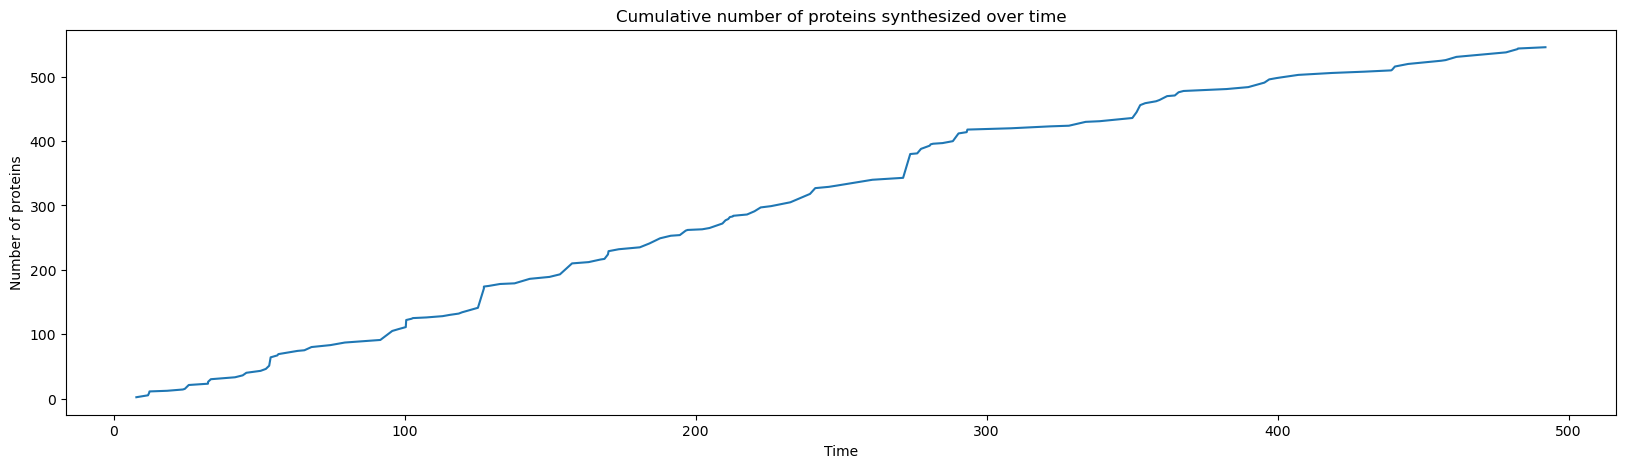

In [13]:
plot_cumulative_proteins_number_over_time(results_df)